## 1. Data Cleaning, Pre-Processing and Basic Exploratory Data Analysis (EDA)

In [1]:
# 1.Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Loading Dataset

df = pd.read_csv("Titanic-Dataset.csv")

# 3.Renaming Columns using regex

import re

df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_',col).lower() for col in df.columns]

# 4.Creating New Feature

df['family_size'] = df['sib_sp'] + df['parch'] + 1

df.drop(['sib_sp', 'parch'], axis = 1, inplace = True)

# 5.Handling Null Values

def basic_impute(df):
    
    df.drop(columns='cabin', inplace=True)
    
    # For numerical columns
    df['age'].fillna(df['age'].mean(), inplace = True)
    
    # For Categorical Columns
    df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
    return df


df1 = basic_impute(df)

# 6.Converting Categorical Features into Numerical Features

from sklearn.preprocessing import LabelEncoder

def one_hot_encoding(df,column):
    df = pd.get_dummies(df, columns = [column], drop_first=False)
    # drop_first=False to avoid Multi-collinearity
    return df

df1 = one_hot_encoding(df1, 'embarked')
df1 = one_hot_encoding(df1, 'sex')

# 7.Standardization

from sklearn.preprocessing import StandardScaler

def standardize_zscore(df, columns):
    scaler = StandardScaler()
    df_standardized = df.copy()
    df_standardized[columns] = scaler.fit_transform(df[columns])
    return df_standardized

columns = ['age', 'fare', 'family_size']
df1_standardized = standardize_zscore(df1, columns)

# 8.Detecting Outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# 9.Handling Outliers 

def iqr_based_capping(df, column, iqr_multiplier=1.5):
    
    df_copy = df.copy()
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df_copy

df1_standardized = iqr_based_capping(df1_standardized, 'age', iqr_multiplier=1.5)
df1_standardized = iqr_based_capping(df1_standardized, 'fare', iqr_multiplier=1.5)
df1_standardized = iqr_based_capping(df1_standardized, 'family_size', iqr_multiplier=1.5)

## 2.Advanced Exploratory Data Analysis (EDA)

In [2]:
df1_standardized.head(2)

,passenger_id,survived,pclass,name,age,ticket,fare,family_size,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",-0.592481,A/5 21171,-0.502445,0.05916,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,PC 17599,0.673106,0.05916,1,0,0,1,0


<Axes: xlabel='age'>

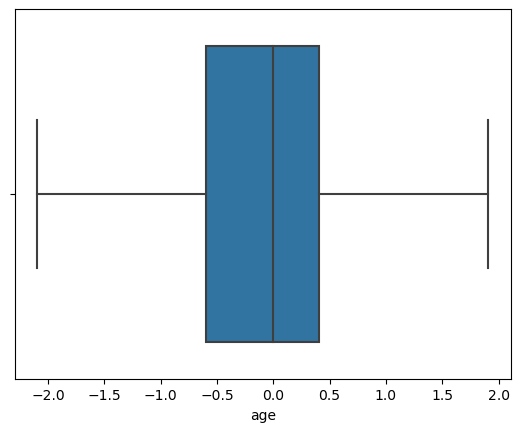

In [3]:
sns.boxplot(x=df1_standardized['age'])

### 2.1 Univariate Analysis

--> Defining the numerical and categorical features

In [4]:
numerical_features = ['age', 'fare', 'family_size']

categorical_features = ['pclass', 'survived', 'embarked_C', 'embarked_Q', 'embarked_S', 'sex_female', 'sex_male']

#### 2.1.1 Univariate Analysis for Numerical Features

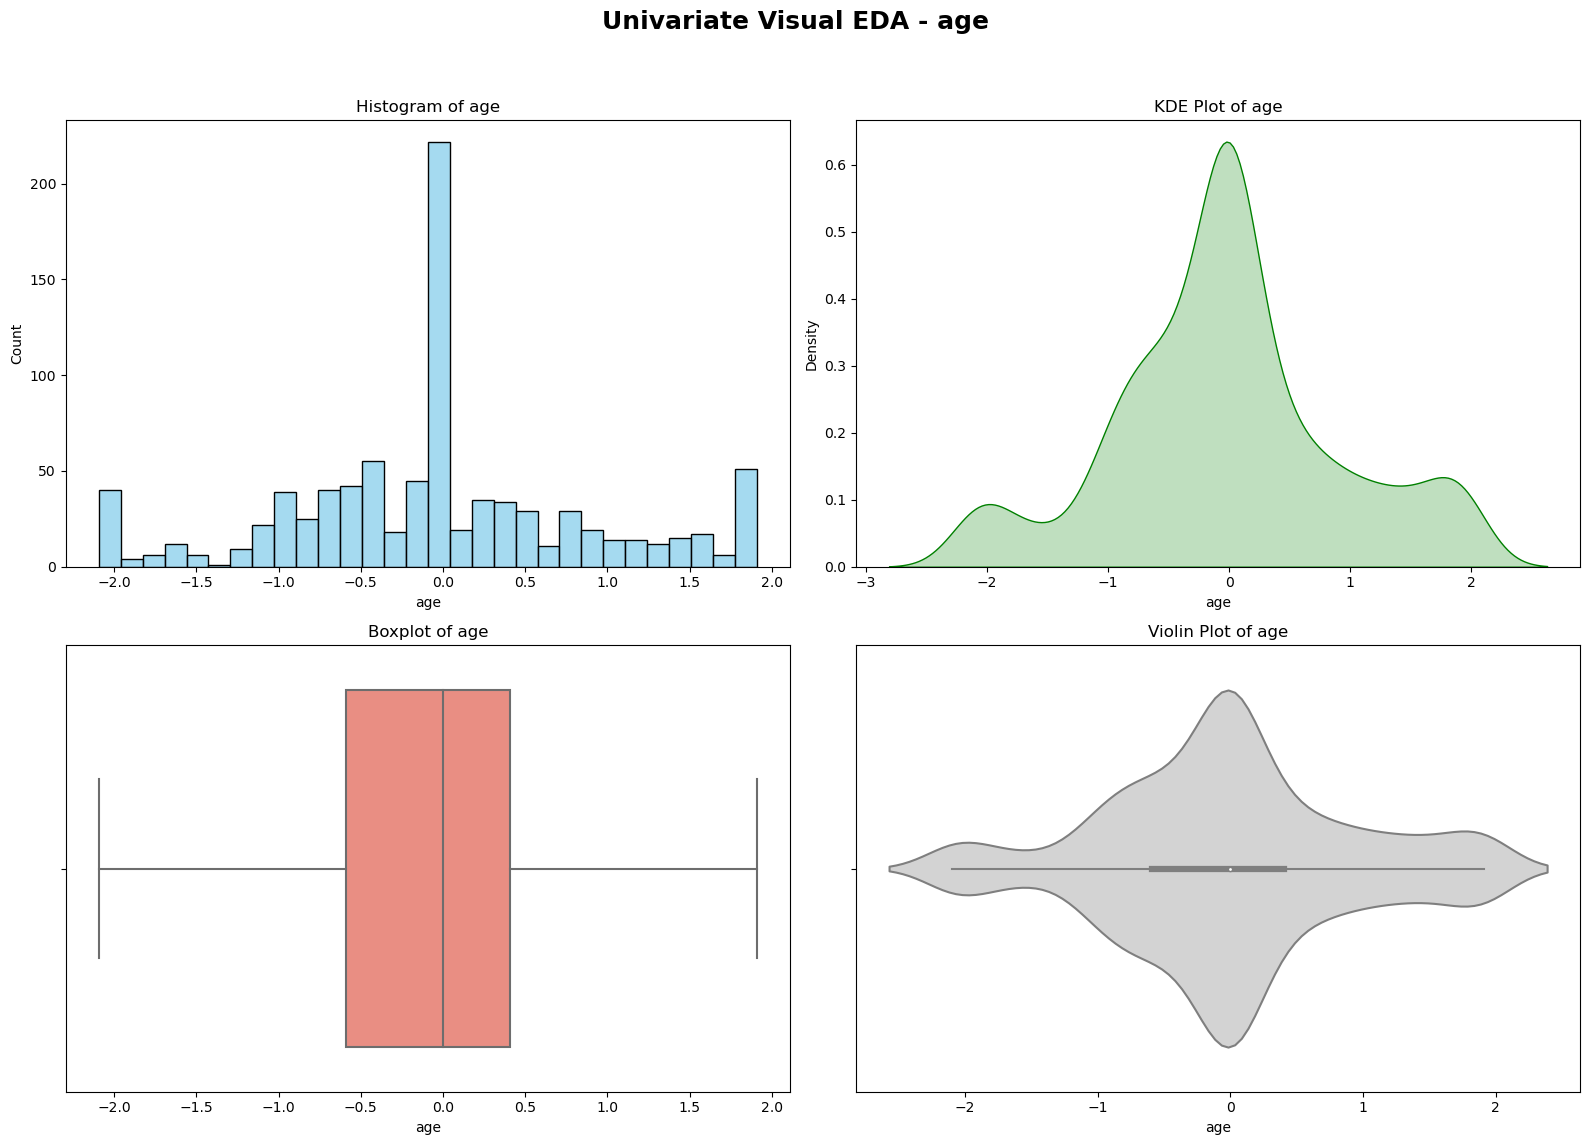

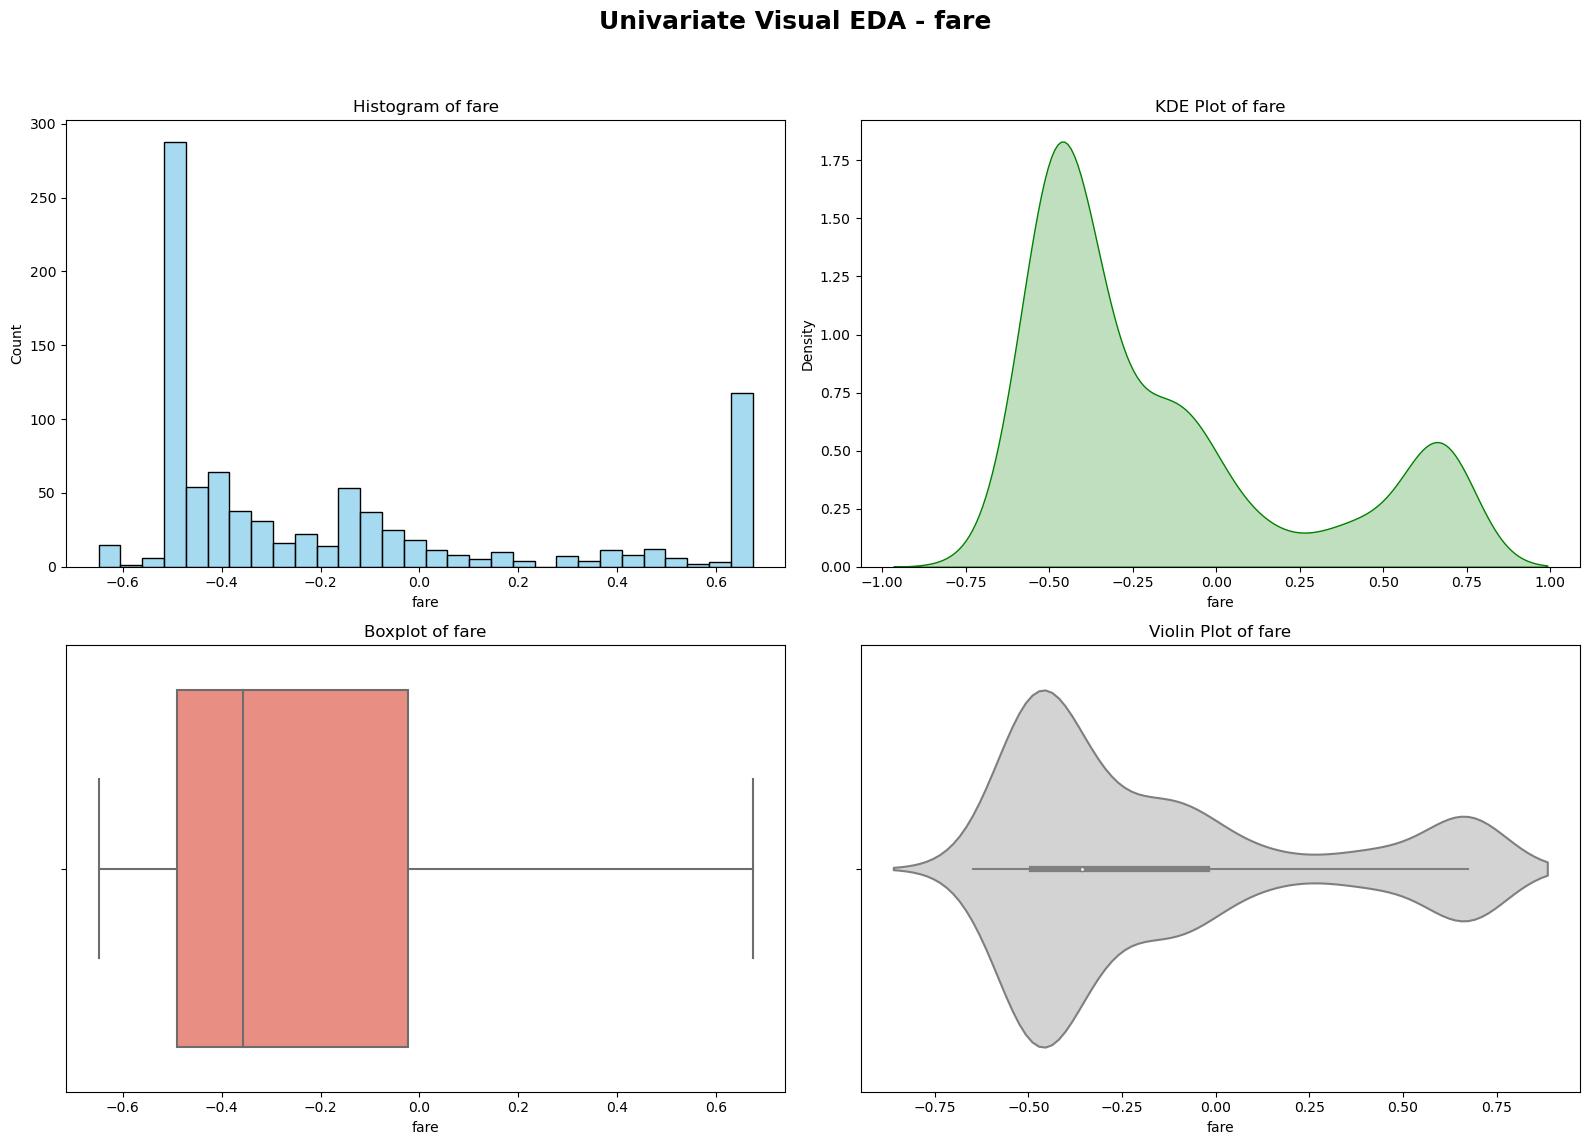

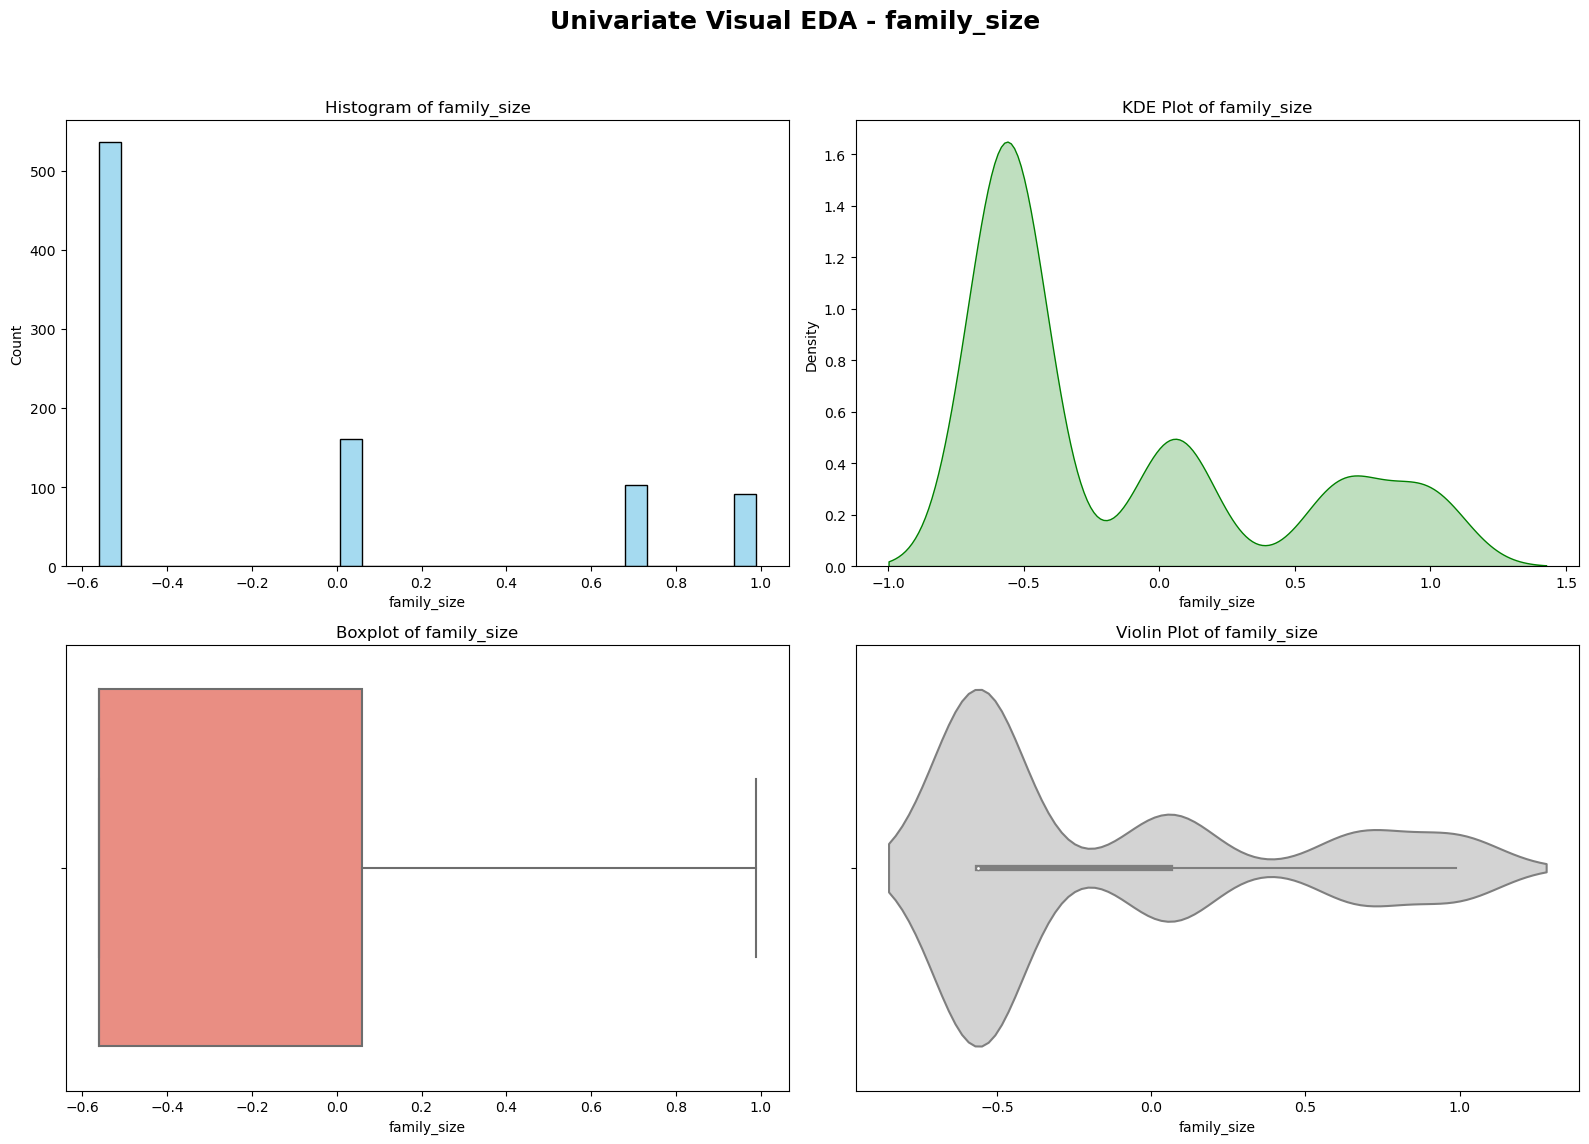

In [5]:
for feature in numerical_features:
    fig, axes = plt.subplots(2, 2, figsize=(16,12))
    fig.suptitle(f"Univariate Visual EDA - {feature}", fontsize=18, weight='bold')
    
     # Histogram
    sns.histplot(data=df1_standardized, x=feature, kde=False, ax=axes[0, 0], bins=30, color='skyblue')
    axes[0, 0].set_title(f'Histogram of {feature}')

    # KDE
    sns.kdeplot(data=df1_standardized, x=feature, ax=axes[0, 1], fill=True, color='green')
    axes[0, 1].set_title(f'KDE Plot of {feature}')

    # Boxplot
    sns.boxplot(data=df1_standardized, x=feature, ax=axes[1, 0], color='salmon')
    axes[1, 0].set_title(f'Boxplot of {feature}')

    # Violin Plot
    sns.violinplot(data=df1_standardized, x=feature, ax=axes[1, 1], color='lightgrey')
    axes[1, 1].set_title(f'Violin Plot of {feature}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

#### 2.1.1 Univariate Analysis for Categorical Features

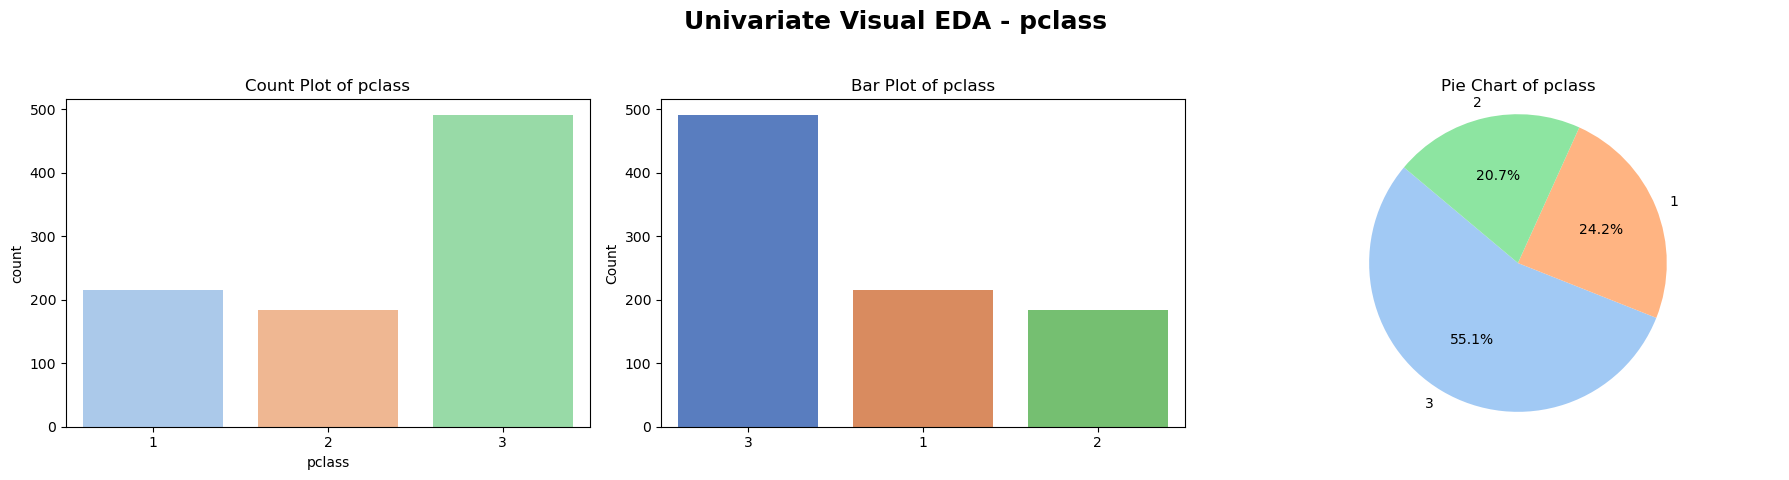

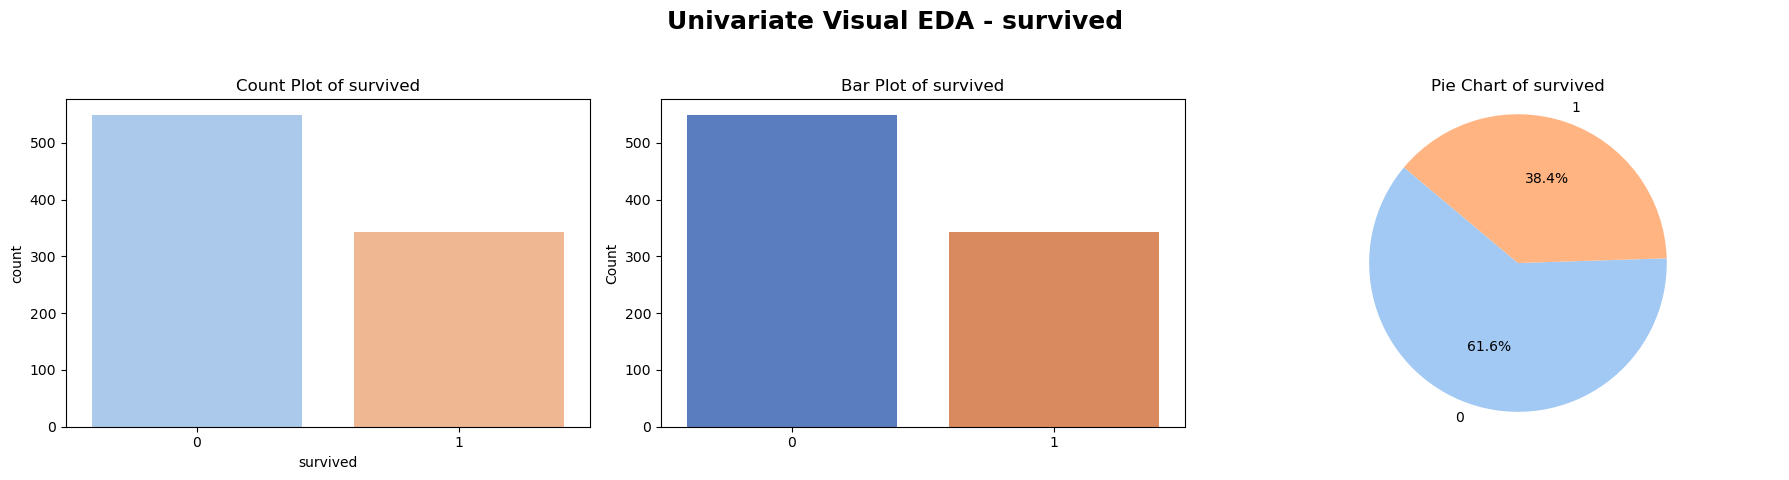

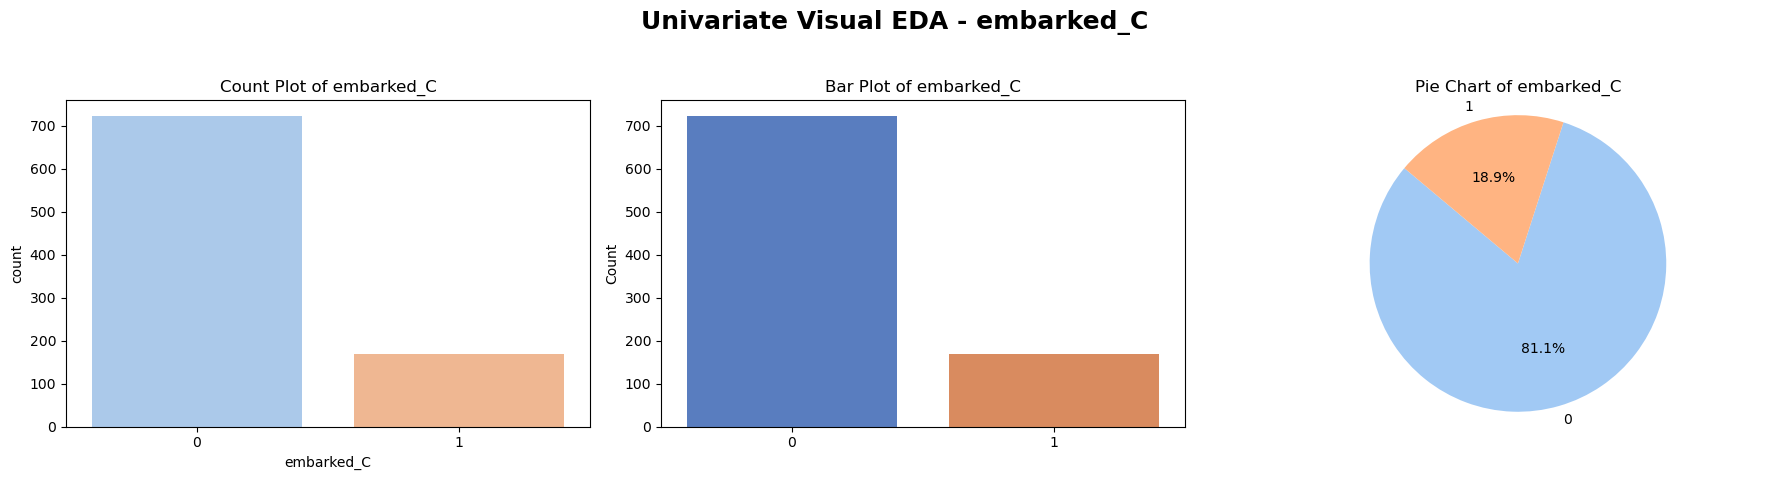

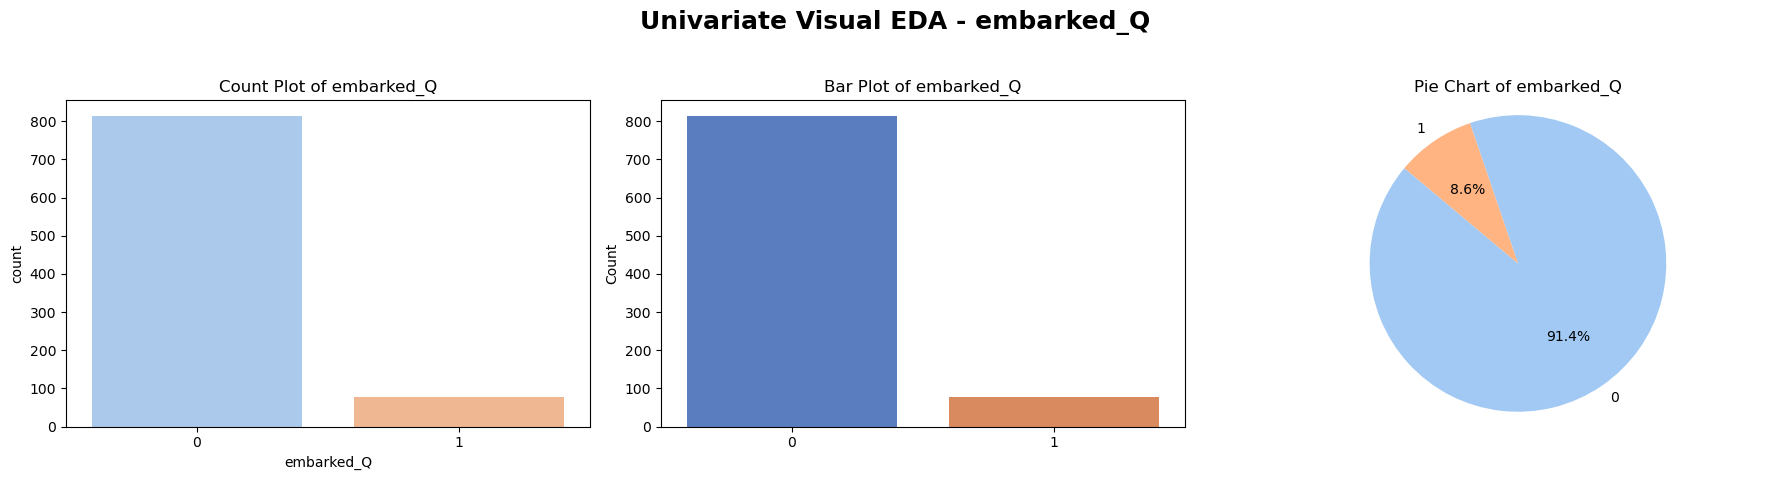

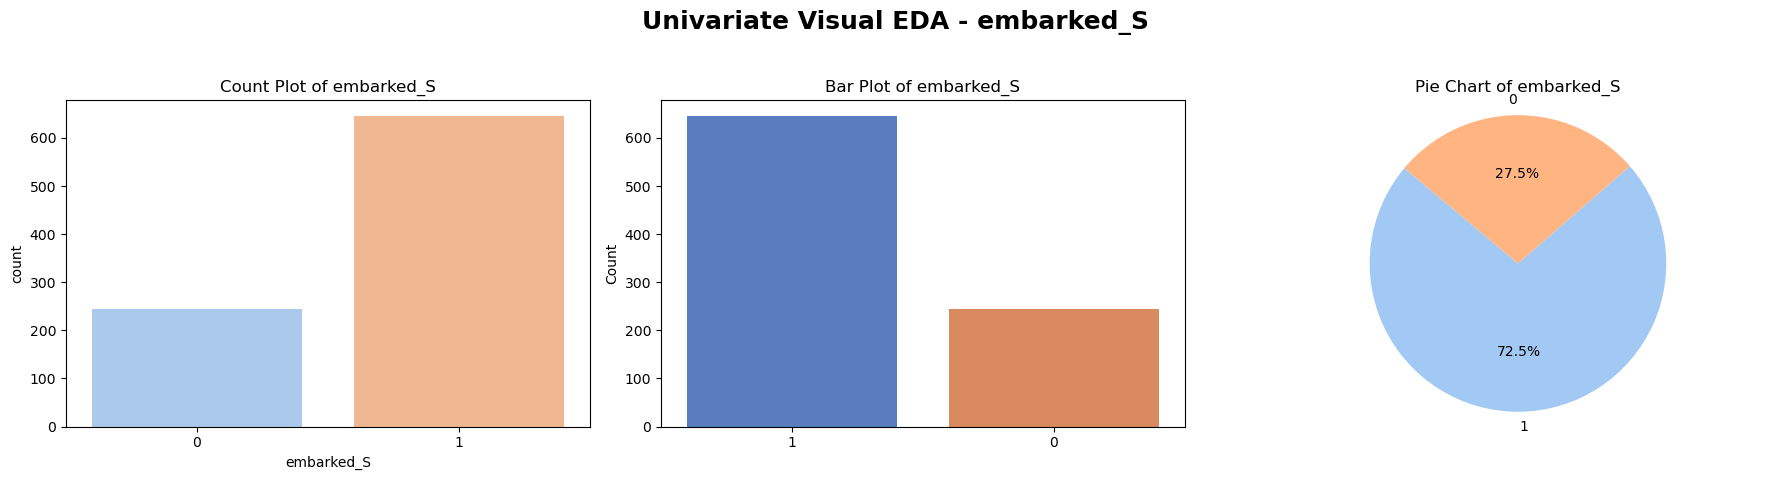

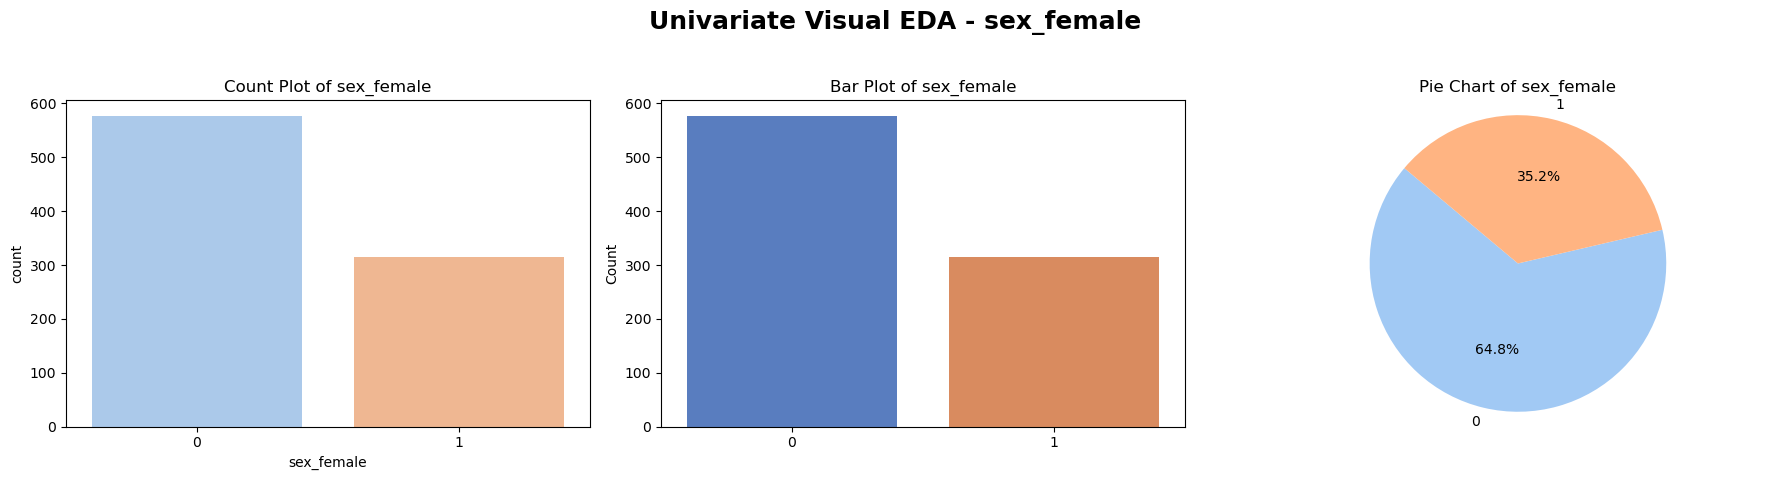

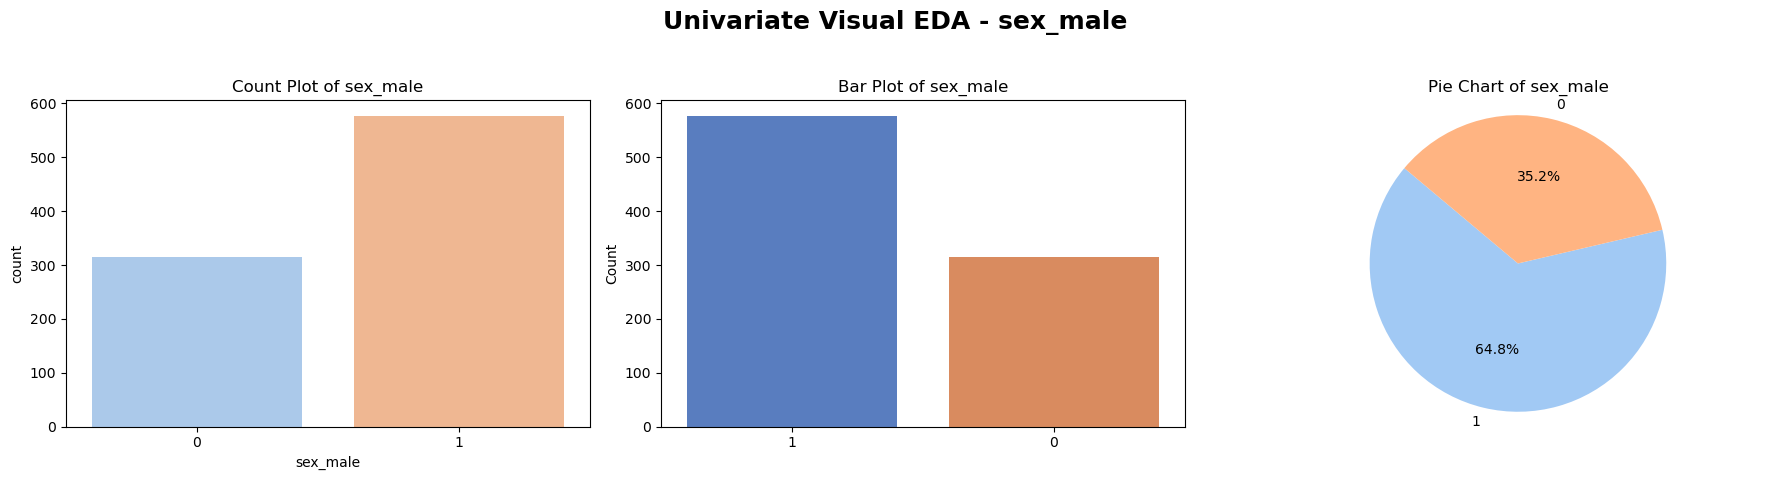

In [6]:
for feature in categorical_features:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Univariate Visual EDA - {feature}', fontsize=18, weight='bold')

    # Countplot
    sns.countplot(data=df1_standardized, x=feature, ax=axes[0], palette="pastel")
    axes[0].set_title(f'Count Plot of {feature}')

    # Bar Plot
    freq = df1_standardized[feature].value_counts()
    sns.barplot(x=freq.index.astype(str), y=freq.values, ax=axes[1], palette="muted")
    axes[1].set_title(f'Bar Plot of {feature}')
    axes[1].set_ylabel('Count')

    # Pie Chart (Only if feature has ≤ 5 categories)
    if df1_standardized[feature].nunique() <= 5:
        axes[2].pie(freq, labels=freq.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
        axes[2].axis('equal')
        axes[2].set_title(f'Pie Chart of {feature}')
    else:
        axes[2].axis('off')
        axes[2].text(0.5, 0.5, 'Too many categories for Pie Chart', ha='center', va='center')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

#### 2.2 Multivariate Analysis 

#### 2.2.1 Multivariate Analysis - Numerical vs Numerical

In [7]:
print(df1_standardized['family_size'].describe())
print(df1_standardized['family_size'].unique())

count    891.000000
mean      -0.148596
std        0.566897
min       -0.560975
25%       -0.560975
50%       -0.560975
75%        0.059160
max        0.989362
Name: family_size, dtype: float64
[ 0.05915988 -0.56097483  0.98936194  0.67929458]


In [8]:
df1_standardized['family_size'] = df1_standardized['family_size'].clip(lower=0)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy to avoid modifying the original
df_for_plot = df1_standardized.copy()

# Scale family_size to be between 5 and 30 for good bubble sizes
scaler = MinMaxScaler(feature_range=(5, 30))
df_for_plot['family_size_scaled'] = scaler.fit_transform(df_for_plot[['family_size']])

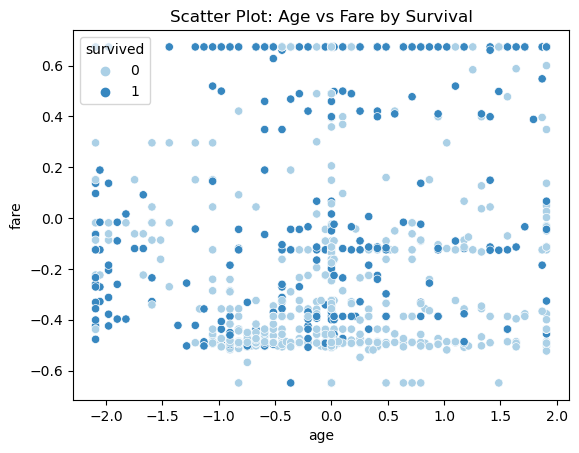

In [10]:
import plotly.express as px
import numpy as np

# Scatter Plots (Numerical vs Numerical)
sns.scatterplot(data=df1_standardized, x='age', y='fare', hue='survived', palette='Blues')
plt.title('Scatter Plot: Age vs Fare by Survival')
plt.show()

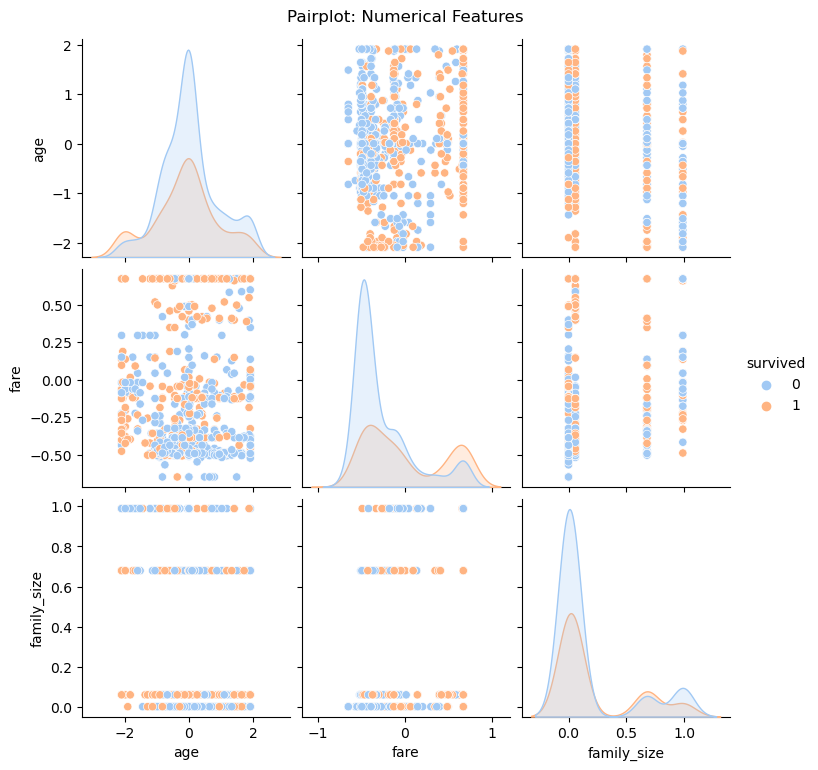

In [11]:
# Pairplots (Seaborn) - Visualizing multiple numerical features pairwise
sns.pairplot(df1_standardized[numerical_features+['survived']], hue='survived', palette='pastel')
plt.suptitle('Pairplot: Numerical Features', y=1.02)
plt.show()

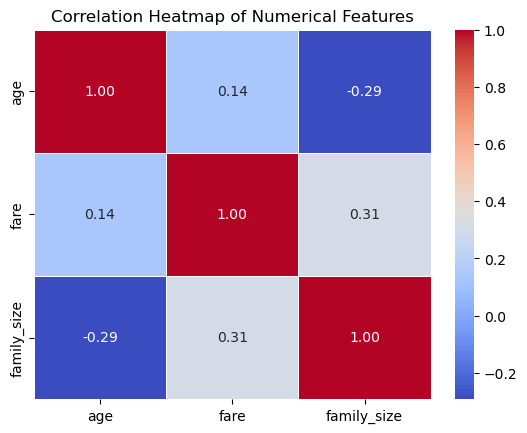

In [12]:
# Correlation Heatmaps - Correlation Matrix of numerical features
corr = df1_standardized[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [13]:
# Bubble Charts (Plotly) - Visualizing relationship between Age, Fare, and Family Size with bubble size as Family Size
#fig = px.scatter(df1_standardized, x='age', y='fare', size='family_size', color='survived', title="Bubble Chart: Age vs Fare with Family Size as Bubble Size")
#fig.show()

In [14]:
import plotly
print(plotly.__version__)

6.0.1


#### 2.2.2 Multivariate Analysis - Categorical vs Numerical

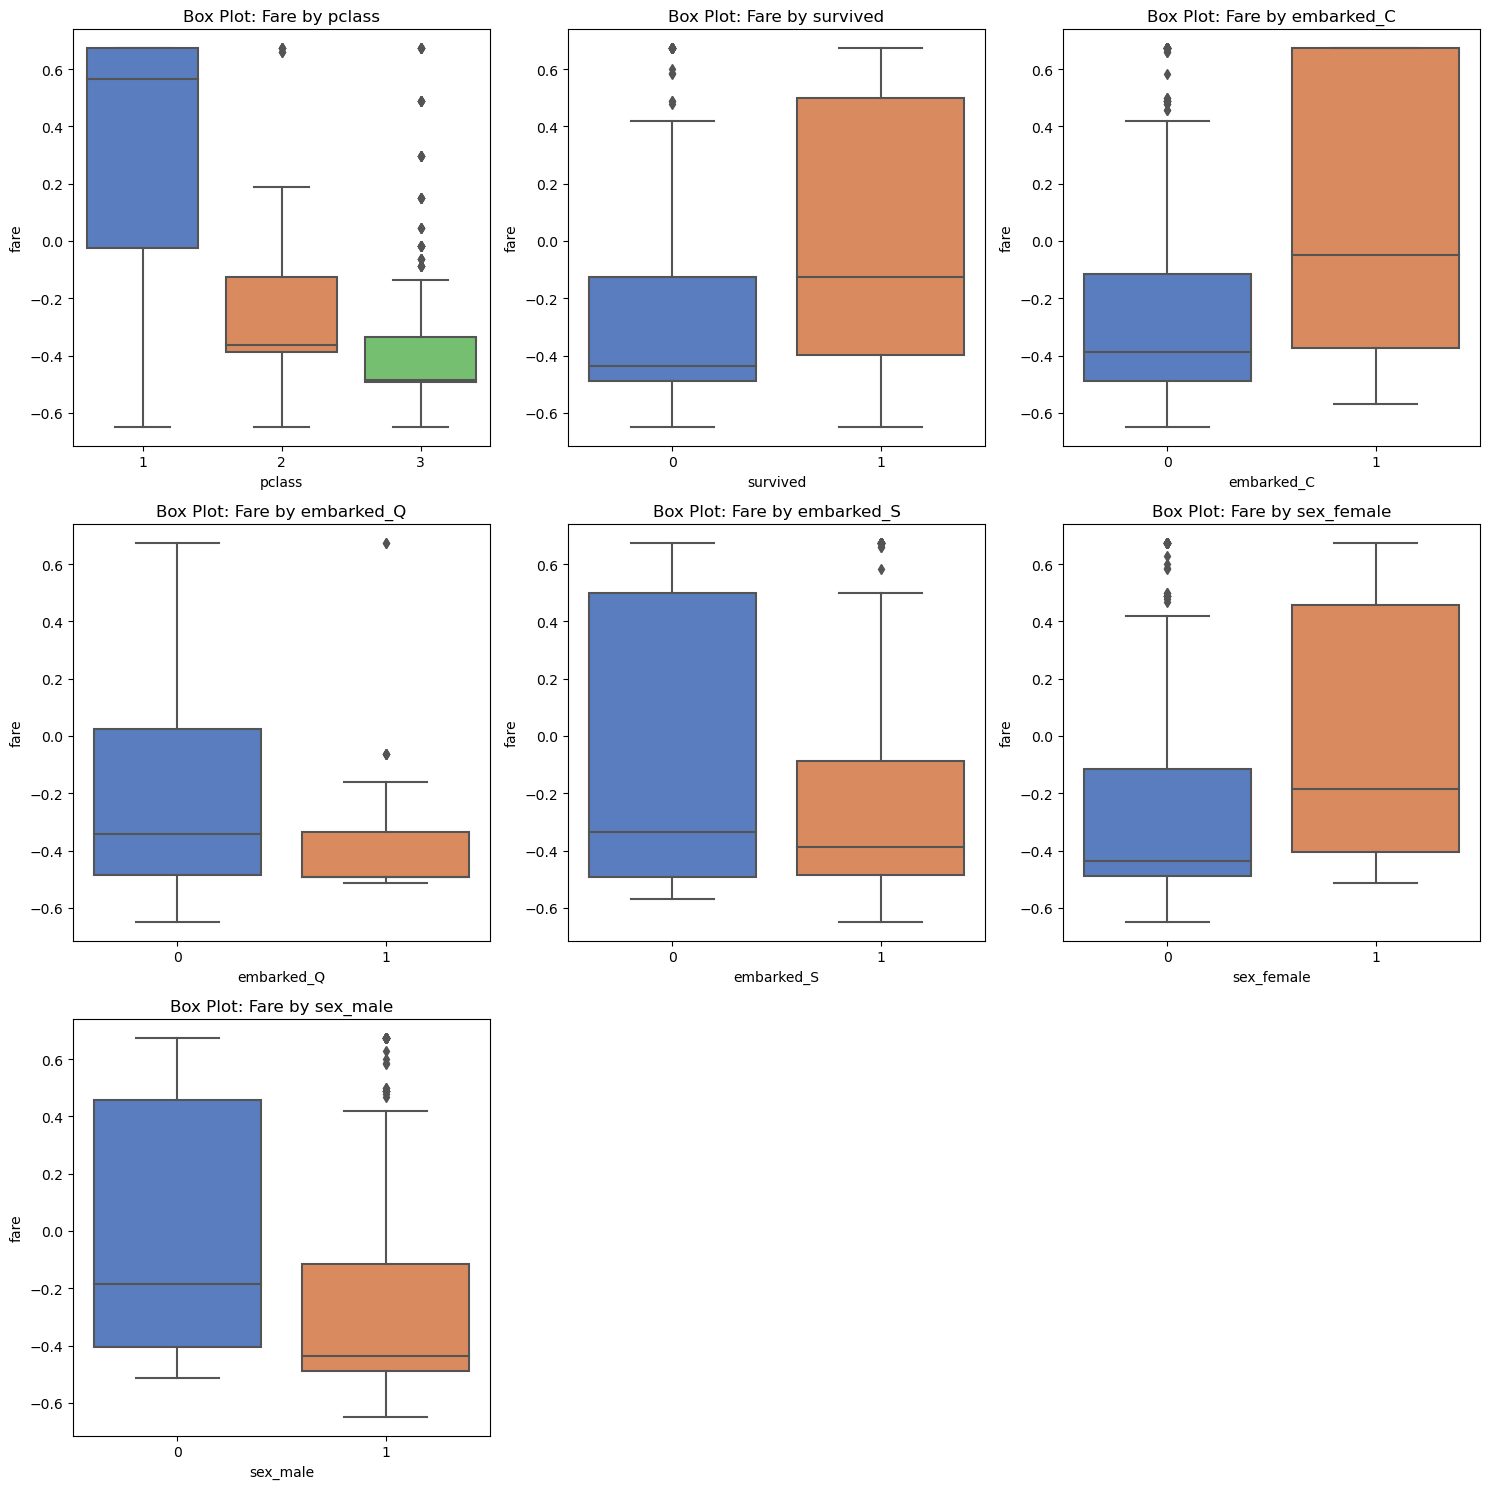

In [15]:
# Calculate the number of rows and columns based on the total number of box plots
num_box_plots = len(categorical_features)
num_columns = 3
num_rows = (num_box_plots + num_columns - 1) // num_columns  # To ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for the axes index
plot_index = 0

# Loop through the categorical features and plot box plots
for feature in categorical_features:
    # Choose the axis for plotting
    ax = axes[plot_index]
    sns.boxplot(data=df1_standardized, x=feature, y='fare', palette="muted", ax=ax)
    ax.set_title(f'Box Plot: Fare by {feature}')
    
    # Move to the next plot
    plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

--Violin/Swarm plots--

for feature in categorical_features:

    plt.figure(figsize=(8, 6))
    
    sns.violinplot(data=df1_standardized, x=feature, y='age', palette="muted")
    
    plt.title(f'Violin Plot: Age by {feature}')
    
    plt.show()

    sns.swarmplot(data=df1_standardized, x=feature, y='fare', palette="pastel", alpha=0.6)
    
    plt.title(f'Swarm Plot: Fare by {feature}')
    
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18396\3747794785.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df1_standardized, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_18396\3747794785.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df1_standardized, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_18396\3747794785.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df1_standardized, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
C:\Users\HP\AppData\Local\Temp\ipykernel_18396\3747794785.py:19: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df1_standardized, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6,

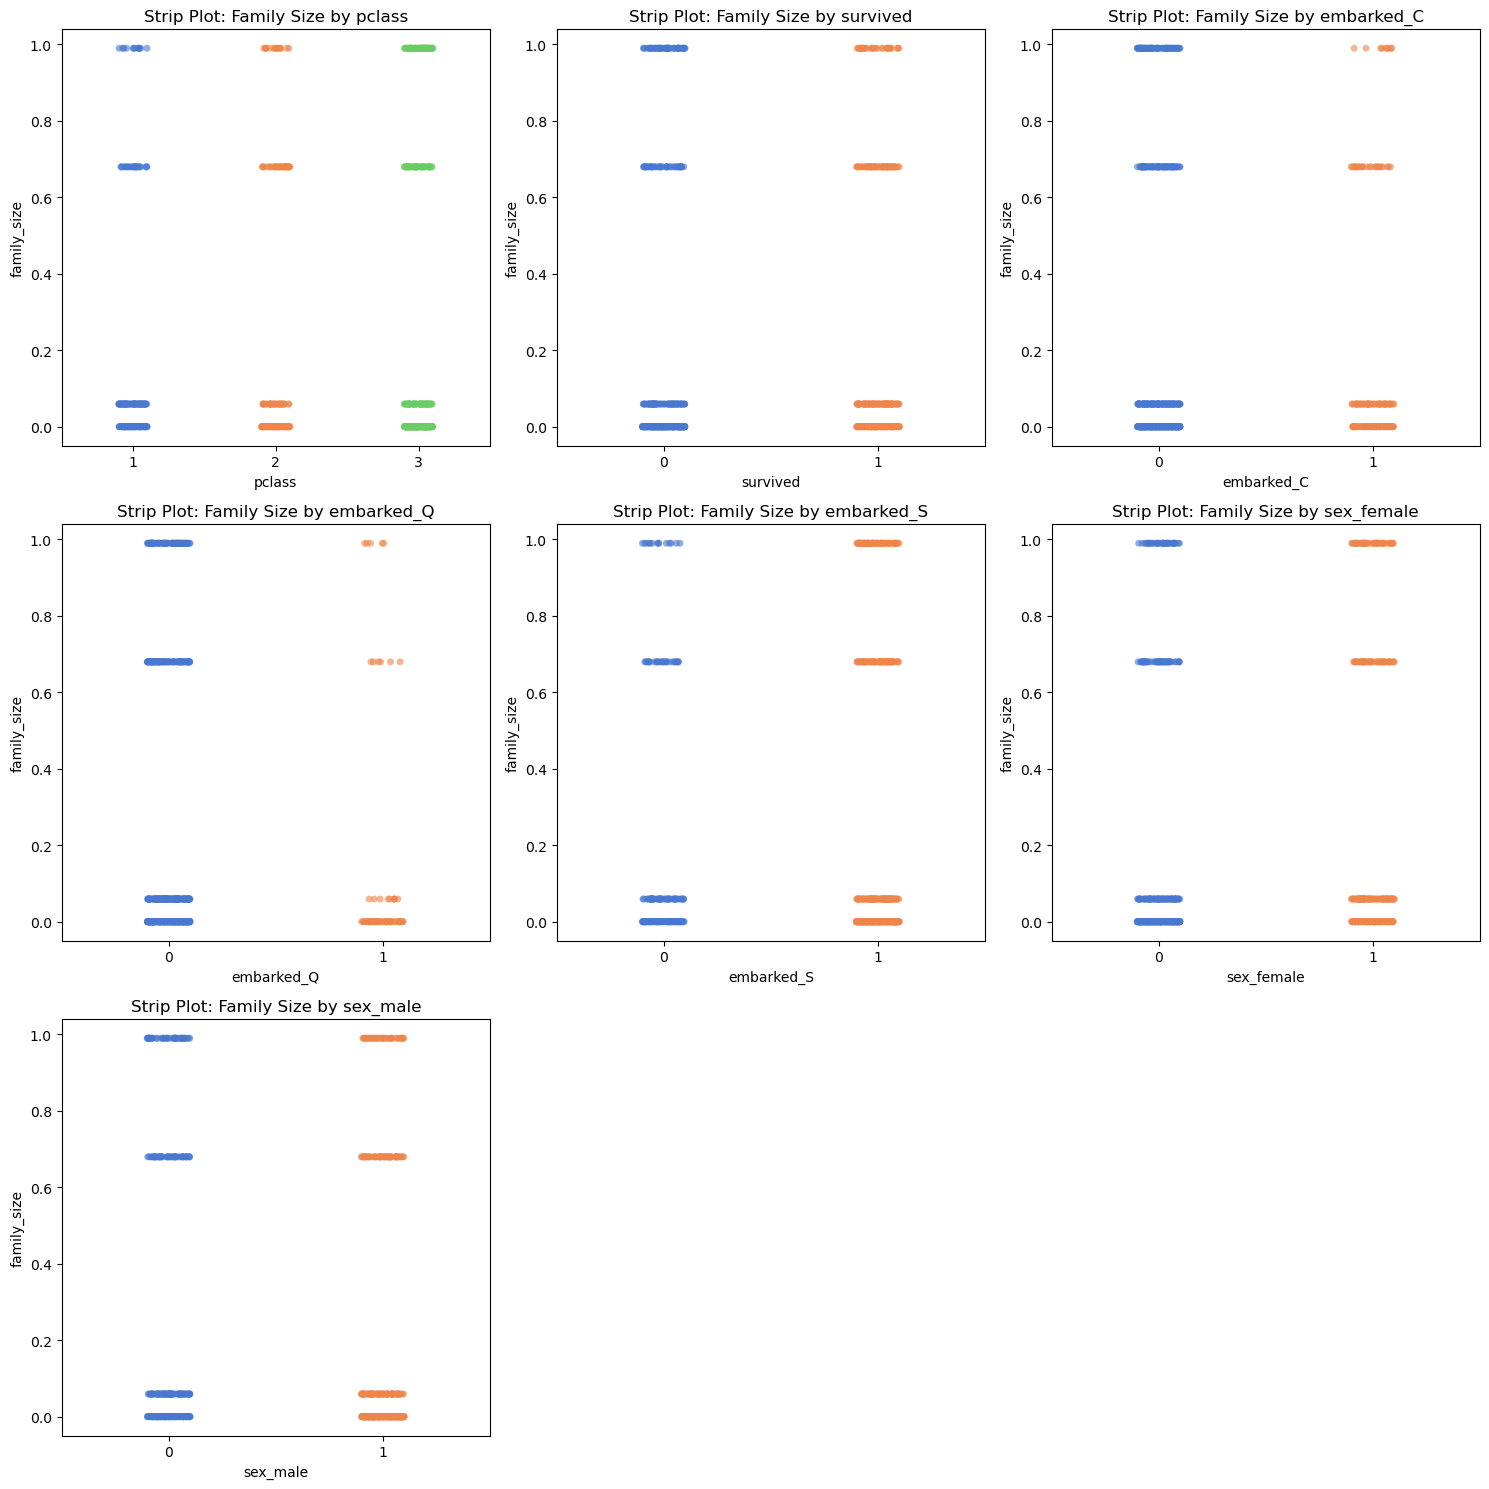

In [16]:
# Calculate the number of rows and columns based on the total number of strip plots
num_plots = len(categorical_features)  # 1 plot for each feature
num_columns = 3
num_rows = (num_plots + num_columns - 1) // num_columns  # To ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for the axes index
plot_index = 0

# Loop through the categorical features and plot strip plots
for feature in categorical_features:
    # Strip Plot
    ax = axes[plot_index]
    sns.stripplot(data=df1_standardized, x=feature, y='family_size', jitter=True, palette="muted", alpha=0.6, ax=ax)
    ax.set_title(f'Strip Plot: Family Size by {feature}')
    
    # Move to the next plot
    plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### 2.2.3 Multivariate Analysis - Categorical vs Numerical

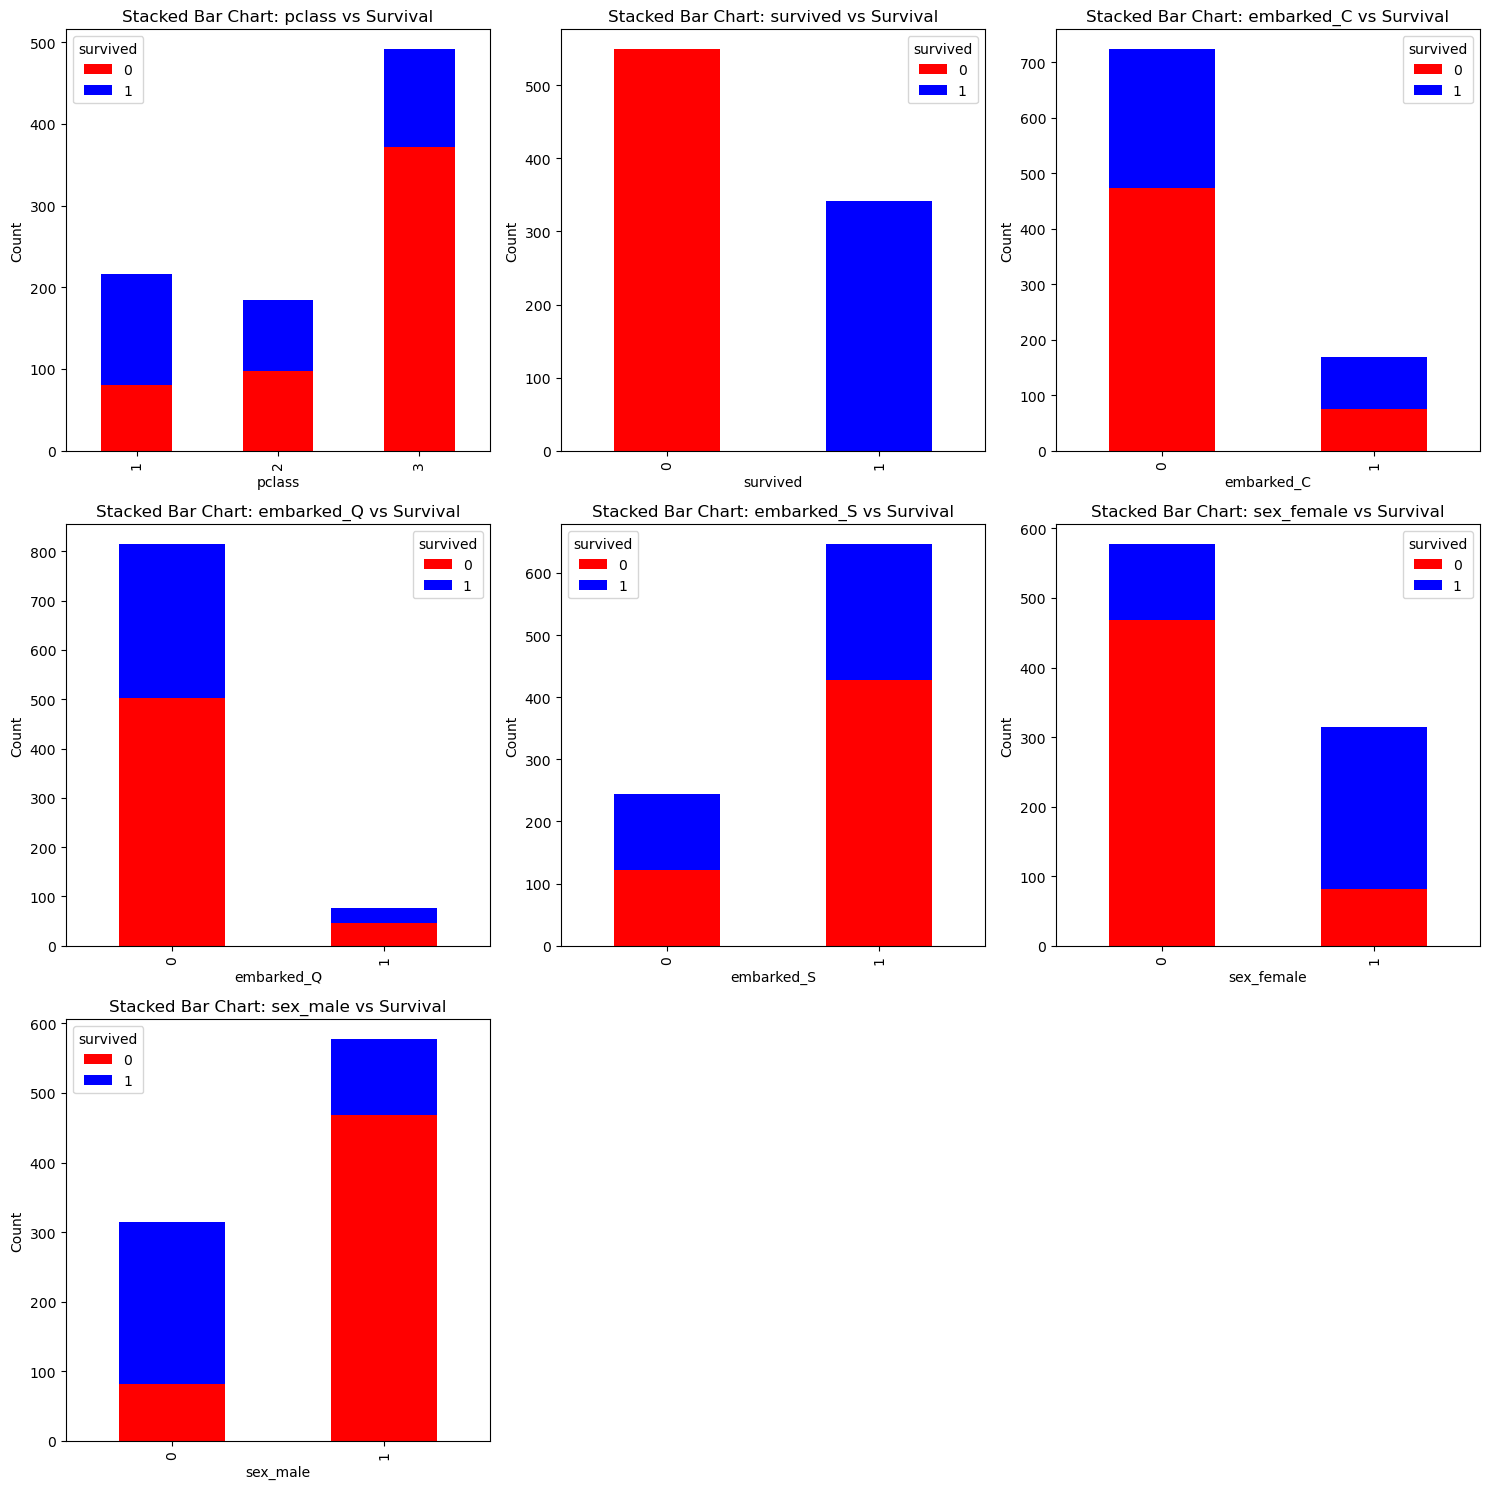

In [17]:
# Calculate the number of rows and columns based on the total number of stacked bar charts
num_plots = len(categorical_features)  # 1 plot for each feature
num_columns = 3
num_rows = (num_plots + num_columns - 1) // num_columns  # To ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for the axes index
plot_index = 0

# Loop through the categorical features and plot stacked bar charts
for feature in categorical_features:
    crosstab = pd.crosstab(df1_standardized[feature], df1_standardized['survived'])
    
    # Stacked Bar Chart
    ax = axes[plot_index]
    crosstab.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=ax)
    ax.set_title(f'Stacked Bar Chart: {feature} vs Survival')
    ax.set_ylabel('Count')
    
    # Move to the next plot
    plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

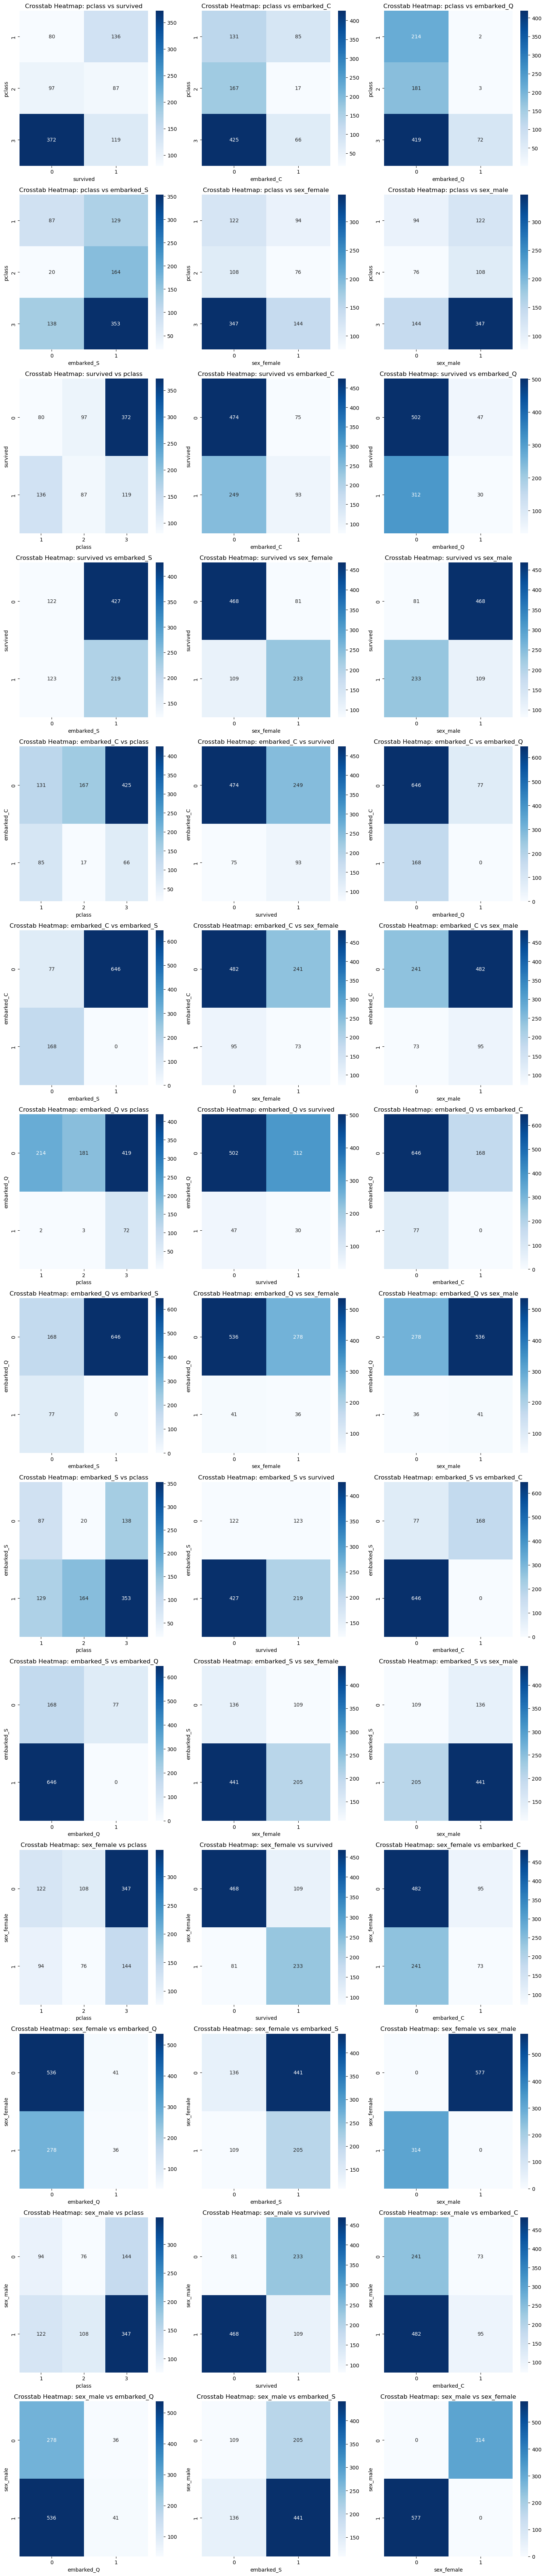

In [18]:
# Calculate the number of rows and columns based on the total number of heatmaps
num_heatmaps = len(categorical_features) * (len(categorical_features) - 1)
num_columns = 3
num_rows = (num_heatmaps + num_columns - 1) // num_columns  # To ensure enough rows

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Counter for the axes index
plot_index = 0

# Loop through the categorical feature pairs and plot heatmaps
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            crosstab = pd.crosstab(df1_standardized[feature1], df1_standardized[feature2])
            
            # Choose the axis for plotting
            ax = axes[plot_index]
            sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d', ax=ax)
            ax.set_title(f'Crosstab Heatmap: {feature1} vs {feature2}')
            
            # Move to the next plot
            plot_index += 1

# Remove any empty subplots
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- What we have till now is basically plotting all the graphs possible, which is exhaustive and doesn't actually give key insights easily.
- So, that is why, we now are doing the Feature Importance
- Since we have small number of features, we could choose manually by simple correaltion analysis.

### More details about the following methods can be found in :

https://github.com/Chaiithra/Complete-Advanced-EDA/tree/main/Feature%20Importances 

### 3.Feature Importance 

#### 3.1 Model-based Feature Importance
-- Importance score derived from model internals (weights, impurity, gain, etc.)
- Tree-based models (Decision Tree/ Random Forest/ Extra Trees Importance)
-  XGBoost/LightGBM/CatBoost Feature Importance
- Logistic regression (coefficients)
- SVM (Linear)

#### 3.2 Statistical Feature Importance (Correlational Methods)
-- Purely data-driven, pre-modeling filters

- Correlation (Pearson, Spearman, Kendall)
- Mutual Information
- Chi-Square Test (for categorical target)
- ANOVA F-test
- Variance Threshold
- Maximal Information Coefficient (MIC)
- Kolmogorov-Smirnov Statistic

#### 3.3 Dimentionality Reduction-based Techniques
-- Feature projections and transformation-based importance

- Principal Component Analysis (PCA)
- t-SNE (for visualization, not selection)
- UMAP
- Autoencoder Feature Compression
- Factor Analysis

#### 3.4 Regularization-based Feature Importance
-- Penalty-induced sparsity methods

- Lasso Regression (L1 penalty)
- Ridge Regression (L2 - not for selection but for shrinkage)
- Elastic Net
- Group Lasso (if features are grouped)
- LARS (Least Angle Regression)

#### 3.5 Advanced & Research-based Techniques
-- High-value academic & ensemble techniques

- Boruta Algorithm
- Recursive Feature Elimination (RFE)/ RFECV
- Stability Selection
- Drop-Column Importance
- SHAP (all types)
- LIME
- Permutation Importance
- PDP
- ReliefF
- MRMR (Minimum Redundancy Maximum Relevance)
- Leave-One-Covariate-Out (LOCO)
- Forward/Backward Sequential Feature Selection

#### 3.6 Neural Network Specific Methods
-- Gradient & attention-based importance
- Integrated Gradients
- Saliency Maps / Grad-CAM
- Attention Weights (NLP/Transformers)
- DeepLIFT
- Attention Weights (NLP/Transformers)
- DeepSHAP
- Layer-wise Relevance Propagation (LRP)

#### 3.7 Feature Importance via Surrogate Models
-- Train interpretable models on complex ones

- Surrogate Decision Trees (on ensemble or neural nets)
- Linear Approximation of Non-linear Models
- Local Surrogate Models (e.g., in LIME)
- Model Distillation-based Attribution

#### 3.8 Meta / Consensus Techniques
-- Aggregate rankings across multiple methods

- Rank Aggregation Across Methods
- Weighted Voting of Feature Ranks
- Clustering Importance Scores
- Consensus Stability Score across folds/methods
- SHAP + RFE + Correlation Overlay (hybrid consensus)